# Week08: Convolutional Neural Networks

This week, we discuss convolutional neural network a type of neural network well suited for computer vision. tasks like image classification, object detection and segmentation can be performed using CNNs.

**Image classification:**

Image classification involves classifying an image as belonging to one of several predifined classes based on its contents.

**object detection:**

This involves identifying where objects are located in an image and putting a bounding box around them

**segmentation:**

This involves identifying pixels belonging to specific objects in an image.

#### Neural Network representation
Before diving into convolutional neural networks, let's take a brief look at neural networks starting with their representation.
<img src="https://i.ibb.co/KXVLBGH/Neural-Networks-Forward-and-Backward-Propagations.png" alt="Neural-Networks-Forward-and-Backward-Propagations"/>

A neural network is composed of several layers of neurons. These layers are classified into 3 main layers.
1. The input layer: This layer contains the input features into the neural network
2. The hidden layers: There may be one or more hidden layers 
3. The output layer: This is where the networks output is obtained

Each layer has neurons and weights associated with it. The layer weights determine how the network behaves in providing results for any input presented.The network is organized in such a way that the output of a preceding layer is the input of the next layer.

The neural network learns from data using a method called backpropagation. Backpropagation adjusts the weights of each layer in the network till the network can provide reasonable result for any input data.

In [2]:
# building a neural network
%tensorflow_version 2.x 
import tensorflow as tf



TensorFlow 2.x selected.


In [0]:
n_input = 3072
network = tf.keras.Sequential([tf.keras.layers.Dense(20, activation="relu", input_shape=(n_input,)),
                               tf.keras.layers.Dense(20, activation="relu"),
                               tf.keras.layers.Dense(10, activation="softmax")
                               ])

network.compile(optimizer="adam", loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [4]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                61460     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 62,090
Trainable params: 62,090
Non-trainable params: 0
_________________________________________________________________


<img src="https://i.ibb.co/KXVLBGH/Neural-Networks-Forward-and-Backward-Propagations.png" alt="Neural-Networks-Forward-and-Backward-Propagations"/>


Let's use this neural network for an image classification task. In this task, the goal is to classify an image as being either an image of one class out of a set of 10 classes;

airplanes, 

cars, 

birds, 

cats, 

deer, 

dogs, 

frogs, 

horses, 

ships, and 

trucks

A dataset called cifar-10 has so many images of these classes. We can train our network using the cifar-10 dataset and end up with a network that can classify images.

Let's Get the dataset:

In [0]:
# get cifar-10 form Joseph Redmond
!wget http://pjreddie.com/media/files/cifar.tgz
!tar xzf cifar.tgz

URL transformed to HTTPS due to an HSTS policy
--2019-11-09 00:57:13--  https://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168584360 (161M) [application/octet-stream]
Saving to: ‘cifar.tgz.1’

cifar.tgz.1         100%[===================>] 160.77M  20.7MB/s    in 8.6s    

2019-11-09 00:57:22 (18.7 MB/s) - ‘cifar.tgz.1’ saved [168584360/168584360]



In [0]:
# read in the data
from pathlib import Path
cifar10 = Path("./cifar")

In [6]:
# print contents in the folder
for content in cifar10.iterdir():
    print(content)

cifar/train
cifar/test
cifar/labels.txt


In [0]:
# get train data and store into numpy array
train_dir = cifar10/"train"
test_dir = cifar10/"test"

import matplotlib.pyplot as plt
import numpy as np

# read in data as a list of (numpy array, label)
train_data = [(np.expand_dims(plt.imread(str(f)),0), str(f).split(".")[0].split("_")[1]) for f in train_dir.iterdir() if "png" in f.name]
test_data = [(np.expand_dims(plt.imread(str(f)),0), str(f).split(".")[0].split("_")[1]) for f in test_dir.iterdir() if "png" in f.name]


# stack the arrays in the lisst
train_X = np.vstack([x[0] for x in train_data])
test_X = np.vstack([x[0] for x in test_data])
train_y = [x[1] for x in train_data]
test_y = [x[1] for x in test_data]

In [8]:
# first 5 classes
train_y[:5]

['frog', 'airplane', 'truck', 'frog', 'truck']

map class names to integers

In [0]:
idx_name = np.unique(train_y)
name_idx = {f:i for i,f in enumerate(idx_name)}

train_y = np.array([name_idx[name] for name in train_y])
test_y = np.array([name_idx[name] for name in test_y])

Display examples for viewing

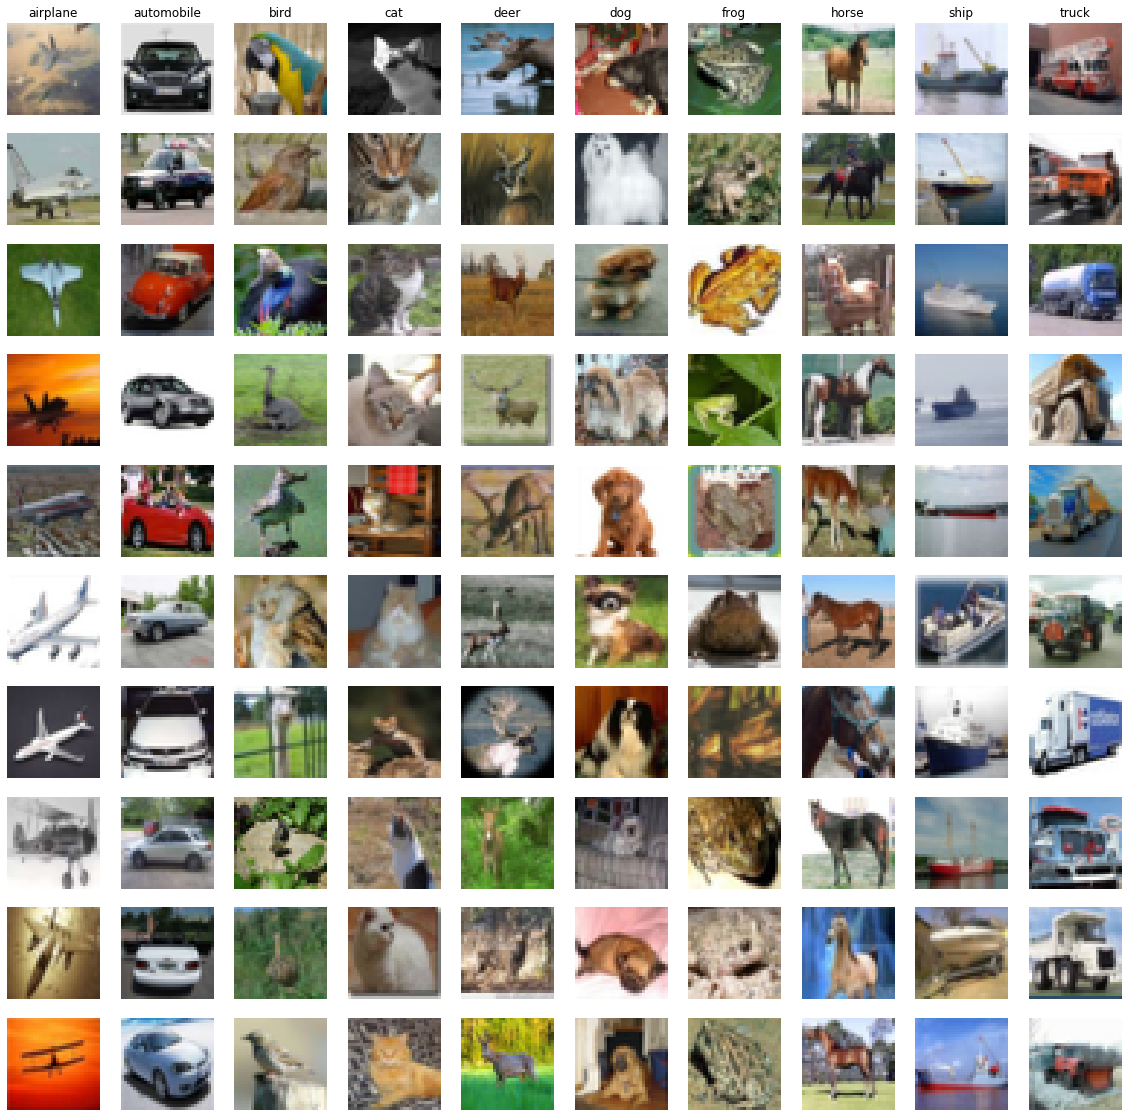

In [10]:
fig, ax = plt.subplots(10,10, figsize=(20,20))

for i in range(10):
    # class i
    examples = train_X[train_y==i]
    examples = examples[np.random.choice(len(examples), 10, False)]#np.random.choice(train_X[train_y==i], 10, False)
    for j in range(10):
        ax[j,i].imshow(examples[j])
        ax[j,i].axis("off")
        if j==0:
            ax[j,i].title.set_text(idx_name[i])

prepare the data to be fed into the neural network

In [0]:
n_train, n_test = train_X.shape[0], test_X.shape[0]
X_train, X_test = np.reshape(train_X, (n_train, -1)),  np.reshape(test_X, (n_test, -1))

In [12]:
print("Train data")
print(f"Initial shape: {train_X.shape}, Reshaped to: {X_train.shape}")
print("Test data")
print(f"Initial shape: {test_X.shape}, Reshaped to: {X_test.shape}")

Train data
Initial shape: (50000, 32, 32, 3), Reshaped to: (50000, 3072)
Test data
Initial shape: (10000, 32, 32, 3), Reshaped to: (10000, 3072)


let's view our network again

In [13]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                61460     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 62,090
Trainable params: 62,090
Non-trainable params: 0
_________________________________________________________________


In [14]:
# networks input shape
network.input_shape

(None, 3072)

Networks input shape should match that of the input data. In this case the input shape should be 3072. We'd now head back to where the network was defined and change the input shape to 3072.

Training the network:

Training the networks involves passing the data as input into the neural network, examining the output and adjusting the weights. This is repeated several times till the network is able to perform the task well enough.


In [0]:
network.fit(X_train, train_y, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 114us/sample - loss: 2.0146 - accuracy: 0.2389
Epoch 2/10
50000/50000 [==============================] - 4s 89us/sample - loss: 1.8944 - accuracy: 0.3024
Epoch 3/10
50000/50000 [==============================] - 4s 88us/sample - loss: 1.8621 - accuracy: 0.3180
Epoch 4/10
50000/50000 [==============================] - 4s 89us/sample - loss: 1.8470 - accuracy: 0.3215
Epoch 5/10
50000/50000 [==============================] - 5s 93us/sample - loss: 1.8365 - accuracy: 0.3273
Epoch 6/10
50000/50000 [==============================] - 5s 93us/sample - loss: 1.8316 - accuracy: 0.3284
Epoch 7/10
50000/50000 [==============================] - 4s 88us/sample - loss: 1.8308 - accuracy: 0.3296
Epoch 8/10
50000/50000 [==============================] - 4s 89us/sample - loss: 1.8219 - accuracy: 0.3332
Epoch 9/10
50000/50000 [==============================] - 5s 92us/sample - loss: 1.8200 - accuracy: 0.3353
Epoch 10/10
5

We have now trained the network for 10 epochs. The network improved in performance with each training epoch as measured by the accuracy and loss. An epoch is complete when all the training data has passed through the network. Training for 10 epochs means that we passed all the training data through the network ten times. We can Train for more epochs to see improved performance.

In [0]:
network.fit(X_train, train_y, epochs=100)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 94us/sample - loss: 1.8106 - accuracy: 0.3394
Epoch 2/100
50000/50000 [==============================] - 4s 90us/sample - loss: 1.8094 - accuracy: 0.3366
Epoch 3/100
50000/50000 [==============================] - 4s 89us/sample - loss: 1.8037 - accuracy: 0.3392
Epoch 4/100
50000/50000 [==============================] - 4s 90us/sample - loss: 1.8037 - accuracy: 0.3422
Epoch 5/100
50000/50000 [==============================] - 5s 90us/sample - loss: 1.8010 - accuracy: 0.3431
Epoch 6/100
50000/50000 [==============================] - 4s 89us/sample - loss: 1.7985 - accuracy: 0.3434
Epoch 7/100
50000/50000 [==============================] - 5s 90us/sample - loss: 1.7962 - accuracy: 0.3445
Epoch 8/100
50000/50000 [==============================] - 4s 89us/sample - loss: 1.7941 - accuracy: 0.3451
Epoch 9/100
50000/50000 [==============================] - 4s 90us/sample - loss: 1.7927 - accuracy: 0.3440
Epoch

Evaluate the network:

Since the network has been trained, its performance on new examples that are not part of the training set is required to see if the network didn't just memorize the training examples.

So lets start by picking an image from the test data

In [0]:
random_idx = np.random.choice(len(X_test), 1)
chosen_image = X_test[random_idx]
chosen_image_y = test_y[random_idx]

display randomly chosen image

Text(0.5, 1.0, 'dog')

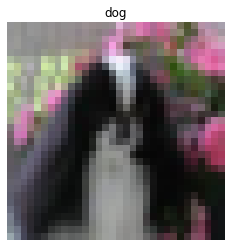

In [16]:
plt.imshow(chosen_image.reshape((32,32,3)))
plt.axis("off")
plt.title(idx_name[chosen_image_y][0])

classify

In [0]:
probs = network.predict(chosen_image)

In [0]:
clas = np.argmax(probs)

class name ?

In [0]:
idx_name[clas]

'ship'

right or wrong ?

well better results could be obtained by training the network for more epochs. Try improving the network's prediction.

# Convolutional Neural Networks

To learn and understand convolutional neural networks, we would gladly make use of cs231n lecture notes. I now think of 2018, when I staired at my computer screen always, watching Andrej Karpathy and reading the lecture notes from cs231n.

<a href="http://cs231n.github.io/convolutional-networks/"><img src="https://i.ibb.co/jDZtJQ1/Screenshot-2019-11-09-at-12-31-05-AM.png" alt="Screenshot-2019-11-09-at-12-31-05-AM" border="0"></a>

<a href="http://cs231n.github.io/convolutional-networks/"><img src="https://i.ibb.co/PYqy51w/Screenshot-2019-11-09-at-12-31-15-AM.png" alt="Screenshot-2019-11-09-at-12-31-15-AM" border="0"></a>

<a href="http://cs231n.github.io/convolutional-networks/"><img src="https://i.ibb.co/8KkSLjw/Screenshot-2019-11-09-at-12-31-24-AM.png" alt="Screenshot-2019-11-09-at-12-31-24-AM" border="0"></a>

<a href="http://cs231n.github.io/convolutional-networks/"><img src="https://i.ibb.co/F0VHcjM/Screenshot-2019-11-09-at-12-31-39-AM.png" alt="Screenshot-2019-11-09-at-12-31-39-AM" border="0"></a>

CNNs in action

To use CNNs, it is good practice to start with a pre-trained model, like VGG16. There are several other pre-trained models.

In [0]:
model = tf.keras.applications.vgg16.VGG16()

now we have a vgg16 model. The vgg16 architecture is shown below

<img src="https://i.ibb.co/RcC2Brh/vgg16.png" alt="vgg16" border="0"/>

In [19]:
# list out all layers in keras vgg16
model.layers

In [0]:
# create a new model from this
new_model = tf.keras.Model(inputs=[model.input], outputs=[model.get_layer("block2_conv2").output])

In [28]:
new_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
Total params: 260,160
Trainable params: 260,160
Non-trainable params: 0
_____________________________________________________

In [0]:
inp = tf.keras.layers.Input(shape=(32,32,3))
x = new_model(inp)
x = tf.keras.layers.Flatten()(x)
y = tf.keras.layers.Dense(10, activation="softmax")(x)

new_model = tf.keras.Model(inputs=[inp], outputs=[y])

In [34]:
# Train
new_model.compile(optimizer="adam", loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
new_model.fit(train_X, train_y, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 759s 15ms/sample - loss: 2.0007 - accuracy: 0.3229
Epoch 2/10
50000/50000 [==============================] - 754s 15ms/sample - loss: 1.0467 - accuracy: 0.6377
Epoch 3/10
50000/50000 [==============================] - 754s 15ms/sample - loss: 0.7094 - accuracy: 0.7565
Epoch 4/10
50000/50000 [==============================] - 760s 15ms/sample - loss: 0.5283 - accuracy: 0.8172
Epoch 5/10
50000/50000 [==============================] - 761s 15ms/sample - loss: 0.3762 - accuracy: 0.8708
Epoch 6/10
50000/50000 [==============================] - 764s 15ms/sample - loss: 0.2661 - accuracy: 0.9063
Epoch 7/10
50000/50000 [==============================] - 776s 16ms/sample - loss: 0.2065 - accuracy: 0.9276
Epoch 8/10
50000/50000 [==============================] - 760s 15ms/sample - loss: 0.1670 - accuracy: 0.9432
Epoch 9/10
50000/50000 [==============================] - 758s 15ms/sample - loss: 0.1445 - accuracy: 0.9

Text(0.5, 1.0, 'automobile')

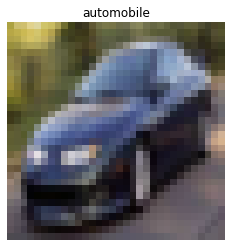

In [40]:
random_idx = np.random.choice(len(X_test), 1)
chosen_image = test_X[random_idx]
chosen_image_y = test_y[random_idx]

plt.imshow(chosen_image.reshape((32,32,3)))
plt.axis("off")
plt.title(idx_name[chosen_image_y][0])

In [41]:
probs = new_model.predict(chosen_image)
clas = np.argmax(probs)
idx_name[clas]

'automobile'